In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df1 = pd.read_csv("twitter_training.csv")
df2 = pd.read_csv("twitter_validation.csv")

In [3]:
df1.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
df2.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
df2.columns=['id','location','Sentiment','text']
df1.columns=['id','location','Sentiment','text']

In [6]:
df = pd.concat([df1,df2])
df

,id,location,Sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [7]:
df.shape

(75680, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75680 entries, 0 to 998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         75680 non-null  int64 
 1   location   75680 non-null  object
 2   Sentiment  75680 non-null  object
 3   text       74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [9]:
df.isna().sum()

id             0
location       0
Sentiment      0
text         686
dtype: int64

In [10]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [11]:
df.isna().sum()

id           0
location     0
Sentiment    0
text         0
dtype: int64

In [12]:
df.Sentiment.value_counts()

Negative      21790
Positive      19845
Neutral       17879
Irrelevant    12624
Name: Sentiment, dtype: int64

In [13]:
df.location.value_counts()

TomClancysRainbowSix                 2349
CallOfDuty                           2333
Verizon                              2330
MaddenNFL                            2326
Microsoft                            2317
WorldOfCraft                         2317
LeagueOfLegends                      2314
TomClancysGhostRecon                 2305
ApexLegends                          2305
NBA2K                                2304
Facebook                             2300
johnson&johnson                      2274
Amazon                               2270
Battlefield                          2269
CallOfDutyBlackopsColdWar            2256
FIFA                                 2256
Dota2                                2240
Hearthstone                          2237
Overwatch                            2231
HomeDepot                            2221
Borderlands                          2221
GrandTheftAuto(GTA)                  2218
Xbox(Xseries)                        2216
Nvidia                            

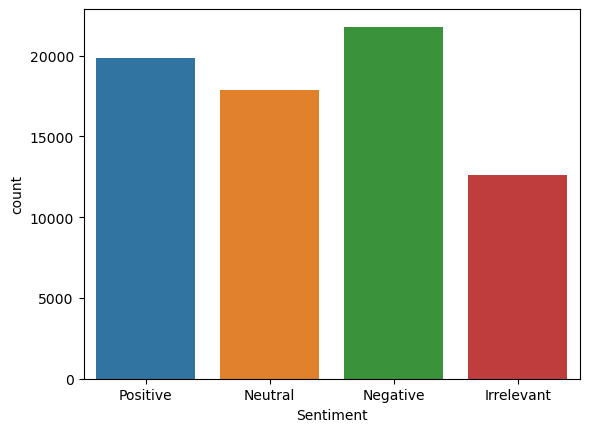

In [14]:
sns.countplot(x='Sentiment',data=df)
plt.show()

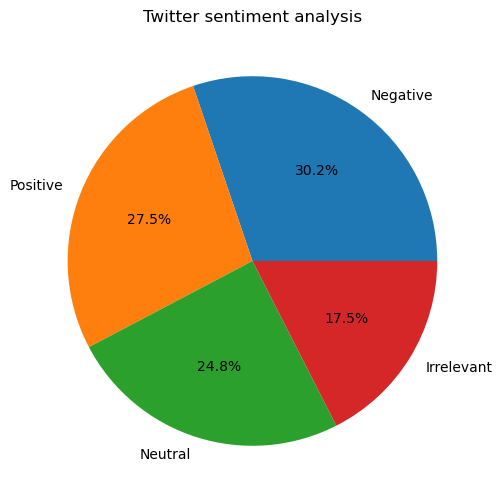

In [15]:
plt.figure(figsize=(12,6))
plt.pie(df.Sentiment.value_counts(),labels= df.Sentiment.value_counts().index,autopct='%1.1f%%')
plt.title("Twitter sentiment analysis")
plt.show()

In [16]:
df.reset_index(drop=True,inplace=True)
df

,id,location,Sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
72133,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
72134,5708,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...
72135,2165,CallOfDuty,Neutral,Late night stream with the boys! Come watch so...
72136,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...


In [17]:
data = df.groupby(["location","Sentiment"]).count().reset_index()
data.head()

,location,Sentiment,id,text
0,Amazon,Irrelevant,188,188
1,Amazon,Negative,566,566
2,Amazon,Neutral,1210,1210
3,Amazon,Positive,306,306
4,ApexLegends,Irrelevant,188,188


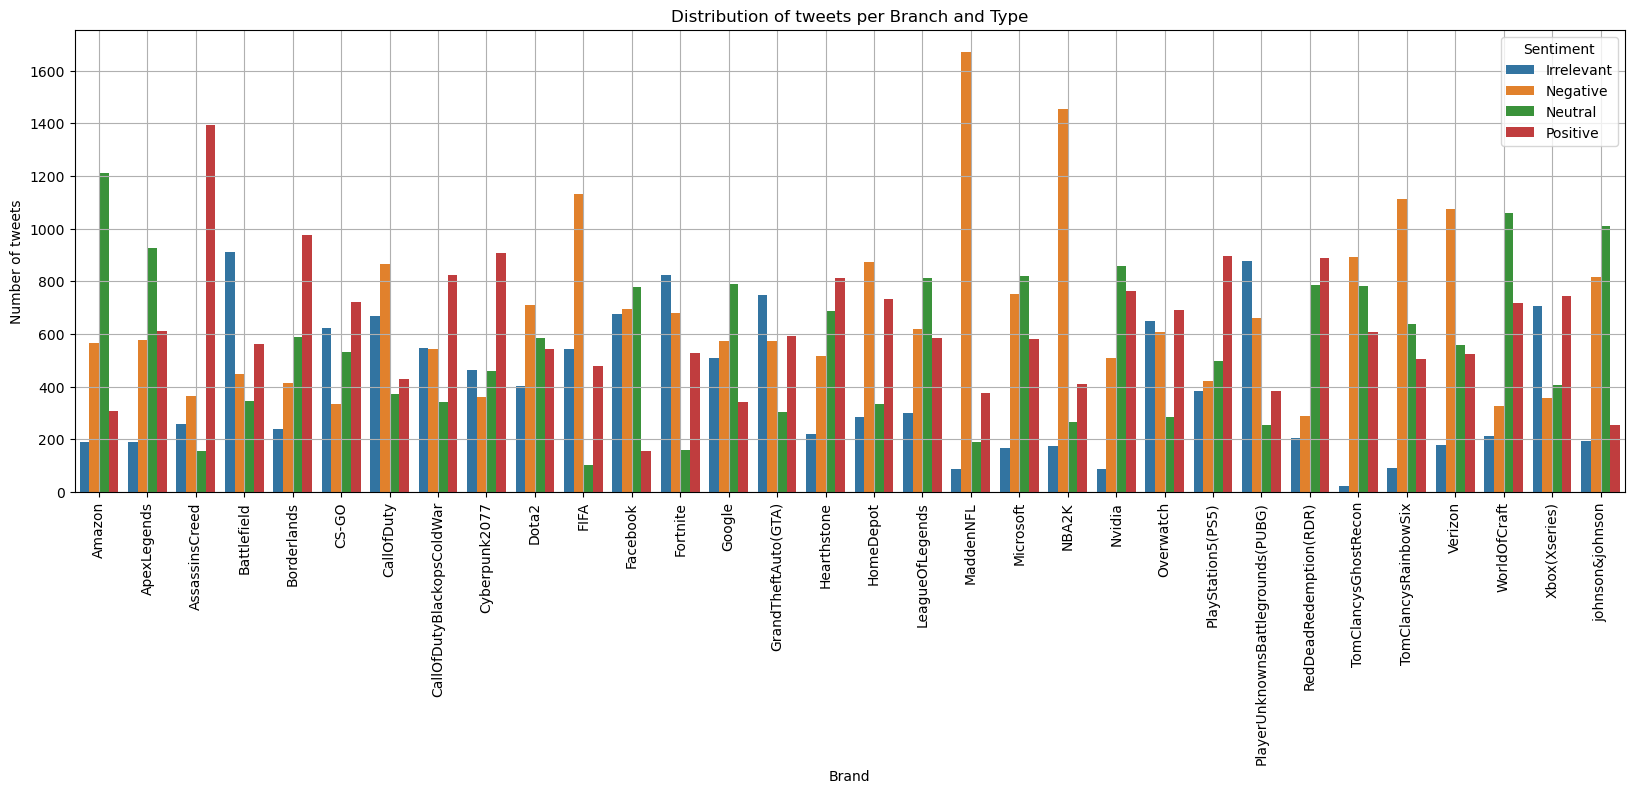

In [18]:
plt.figure(figsize=(20,6))
sns.barplot(data=data,x="location",y="id",hue='Sentiment')
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type")
plt.show()

In [19]:
df.drop(df.index[(df['Sentiment']=='Irrelevant')],axis=0,inplace=True)
df

,id,location,Sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
72131,1373,Battlefield,Negative,I have noticed streamers I watch who are now p...
72132,10588,RedDeadRedemption(RDR),Neutral,@6th__man playing red dead redemption-\n\n“Oh ...
72133,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
72134,5708,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...


In [20]:
df.reset_index(drop=True,inplace=True)
df

,id,location,Sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
59509,1373,Battlefield,Negative,I have noticed streamers I watch who are now p...
59510,10588,RedDeadRedemption(RDR),Neutral,@6th__man playing red dead redemption-\n\n“Oh ...
59511,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
59512,5708,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...


In [21]:
from wordcloud import WordCloud

In [22]:
df.drop(['id','location'],axis=1,inplace = True)
df.head()

,Sentiment,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


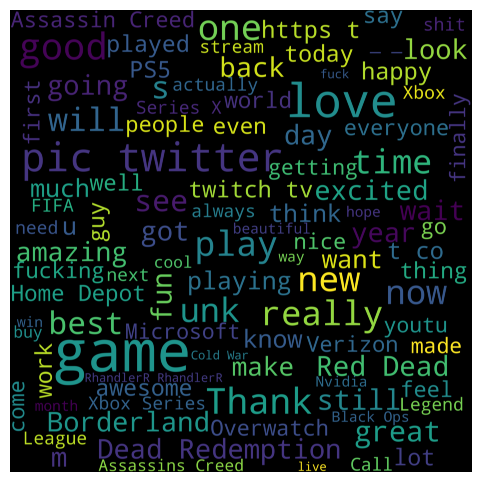

In [23]:
word_cloud_text = ''.join(df[df["Sentiment"]=="Positive"].text)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

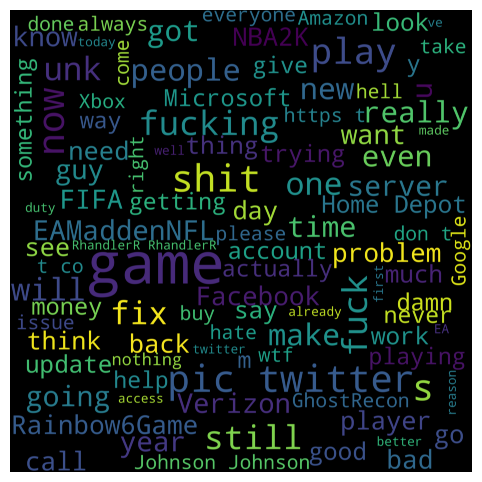

In [24]:
word_cloud_text = ''.join(df[df["Sentiment"]=="Negative"].text)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
df.dtypes

Sentiment    object
text         object
dtype: object